<a href="https://colab.research.google.com/github/sanikaijantakar/Compilators/blob/main/Explainable_skin_cancer_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set up the environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install necessary libraries
! pip install tensorflow keras numpy pandas matplotlib scikit-learn opencv-python

In [ ]:
! pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
! pip install kaggle                #Importing kaggle library to colab python

! mkdir ~/.kaggle                   #Make a kaggle directory in Colab

! cp kaggle.json ~/.kaggle/         #Copy the uploaded kaggle.json to this kaggle directory in colab

! chmod 600 ~/.kaggle/kaggle.json   #Provide rights for our colab to communicate with kaggle

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Download a specific dataset from Kaggle directly into our environment.
!kaggle datasets download -d shashanks1202/skin-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/shashanks1202/skin-cancer-dataset
License(s): MIT


In [ ]:
# Extract the contents of the ZIP file
! unzip skin-cancer-dataset.zip

Archive:  skin-cancer-dataset.zip
replace train_cancer/benign/12.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train_cancer/benign/12.jpg  
  inflating: train_cancer/benign/13.jpg  
  inflating: train_cancer/benign/14.jpg  
  inflating: train_cancer/benign/17.jpg  
  inflating: train_cancer/benign/19.jpg  
  inflating: train_cancer/benign/20.jpg  
  inflating: train_cancer/benign/21.jpg  
  inflating: train_cancer/benign/22.jpg  
  inflating: train_cancer/benign/23.jpg  
  inflating: train_cancer/benign/24.jpg  
  inflating: train_cancer/benign/25.jpg  
  inflating: train_cancer/benign/26.jpg  
  inflating: train_cancer/benign/27.jpg  
  inflating: train_cancer/benign/28.jpg  
  inflating: train_cancer/benign/29.jpg  
  inflating: train_cancer/benign/3.jpg  
  inflating: train_cancer/benign/30.jpg  
  inflating: train_cancer/benign/32.jpg  
  inflating: train_cancer/benign/33.jpg  
  inflating: train_cancer/benign/34.jpg  
  inflating: train_cancer/benign/35.jpg  
  inflati

In [ ]:
# Define directories

#Specifing the main directory
train_dir = '/content/train_cancer'

#Defines the path for benign skin cancer images
benign_dir = f'{train_dir}/benign'

# Defines the path for malignant skin cancer images
malignant_dir = f'{train_dir}/malignant'

In [ ]:
# Import the necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Creating batches of augmented images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 270 images belonging to 2 classes.


In [ ]:
! pip install keras-tuner

In [ ]:
from tensorflow.keras.models import Sequential
from keras_tuner import HyperModel
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from kerastuner import HyperParameters

# Defines and builds a CNN model using Keras Tuner

class CNNHyperModel(HyperModel):
    def build(self, hp):
        # Create a Sequential model
        model = Sequential()

        # This code adds layers to the CNN

        # This adds convolutional layers with adjustable filters
        model.add(Conv2D(
            filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
            kernel_size=(3, 3),
            activation='relu',
            input_shape=(150, 150, 3)
        ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # This adds pooling layers to downsample the feature maps
        model.add(Conv2D(
            filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),
            kernel_size=(3, 3),
            activation='relu'
        ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # This converts the 2D data into a 1D vector
        model.add(Flatten())

        # Hyperparameter tuning for Dense layers
        model.add(Dense(
            units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
            activation='relu'
        ))

        model.add(Dense(1, activation='sigmoid'))

        # Compile the model
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
            ),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        return model

# This creates the model with tunable parameters
hypermodel = CNNHyperModel()

# Create a HyperParameters object
hp = HyperParameters()

# Use the HyperParameters object to build the model
model = hypermodel.build(hp)

# Print model summary
model.summary()

<ipython-input-17-14f42ec1ec90>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperParameters
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Compile the model

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Import the necessary module
from tensorflow.keras.callbacks import EarlyStopping

from kerastuner.tuners import RandomSearch

# Set up the Keras Tuner
tuner = RandomSearch(
    CNNHyperModel(),
    objective='val_accuracy',
    max_trials=10,  # Number of models to try
    executions_per_trial=1,  # Number of times to train each model
    directory='skin_cancer_tuning',
    project_name='cnn_tuner'
)

# Start the hyperparameter search
tuner.search(
    train_generator,
    epochs=10,
    validation_data=train_generator
)

# Get the best model after the search
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, accuracy = best_model.evaluate(train_generator)
print(f'Best Model Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Trial 10 Complete [00h 12m 36s]
val_accuracy: 0.8888888955116272

Best val_accuracy So Far: 0.9629629850387573
Total elapsed time: 01h 50m 44s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9545 - loss: 0.1210
Best Model Loss: 0.1008, Accuracy: 0.9667


In [ ]:
# Save the best model to disk
import os
model_dir = '/content/drive/MyDrive/Project'
model_path = os.path.join(model_dir, 'best_model.keras')
os.makedirs(model_dir, exist_ok=True)
best_model.save(model_path)
print("Model saved successfully at:", model_path)

Model saved successfully at: /content/drive/MyDrive/Project/best_model.keras


In [ ]:
model.save('best_model.keras')

Enter the path to the image: /content/train_cancer/malignant/100.jpg


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
--------------------------------------------------
PREDICTION RESULT: Malignant
CONFIDENCE: 93.34%
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)


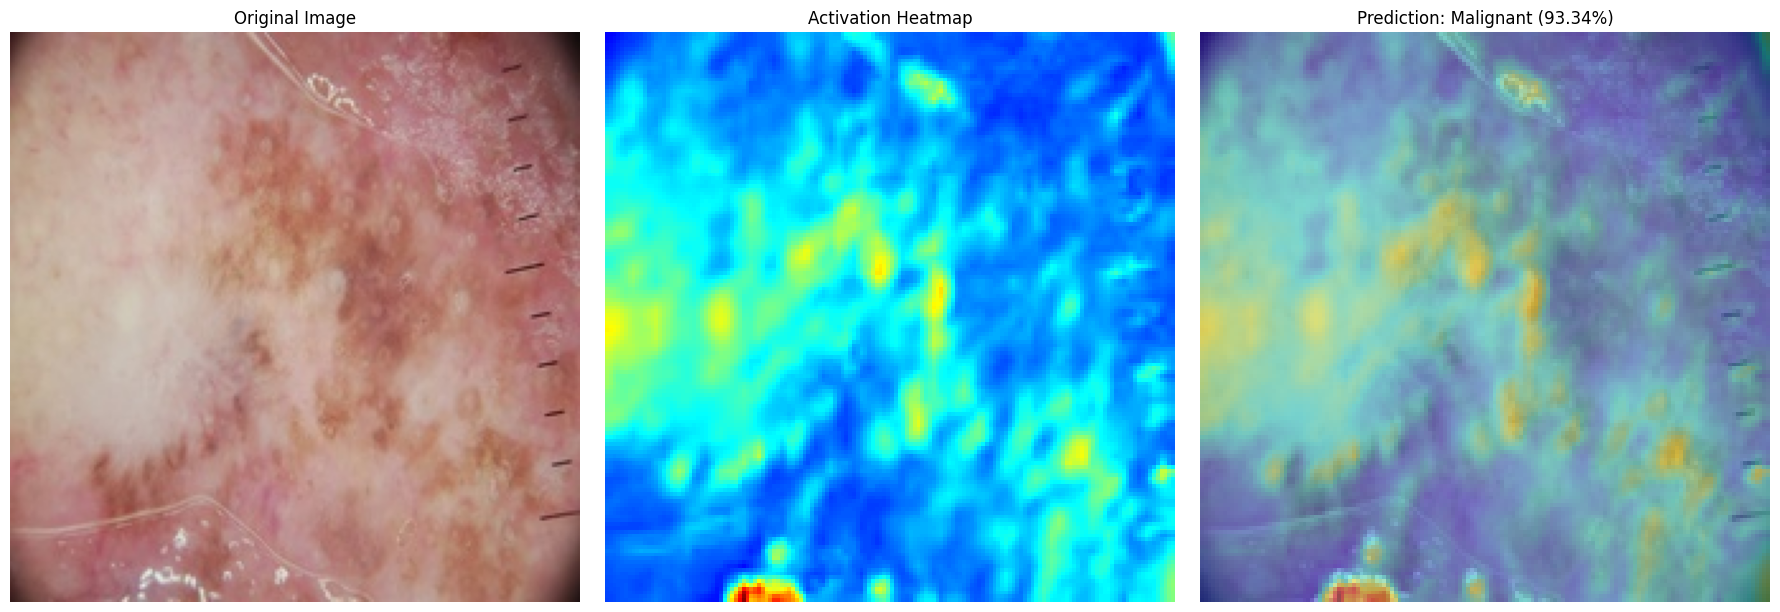


EXPLANATION:
The model has classified this skin lesion as Malignant with 93.34% confidence.
A malignant classification suggests this may be a skin cancer lesion.
The highlighted areas in the heatmap show the regions that most influenced this decision.
RECOMMENDATION: This result suggests medical follow-up is advisable.

NOTE: This is an AI prediction and should not replace professional medical diagnosis.
--------------------------------------------------


In [ ]:
# Replace the section after loading the model (starting from line 145)
# The rest of your original code remains unchanged

import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

def preprocess_image(image_path):
    """Preprocess image for model input and visualization"""
    image = Image.open(image_path)
    image = image.convert('RGB')
    # Store original image for display
    original_img = np.array(image)
    # Resize for model input
    image = image.resize((150, 150))
    image_array = np.array(image)
    # Store resized image for heatmap overlay
    processed_img = image_array.copy()
    # Normalize for model
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array, original_img, processed_img

# Create an activation-based heatmap
def get_activation_heatmap(model, img_array):
    """Generate activation-based heatmap from the last convolutional layer"""
    # Create a list to store layer names and indices
    conv_layers = []

    # Find all convolutional layers in the model
    for i, layer in enumerate(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            conv_layers.append((i, layer.name))

    if not conv_layers:
        return None

    # Get the last convolutional layer
    last_conv_idx, last_conv_name = conv_layers[-1]

    # Create a model that outputs the last conv layer activations
    activation_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=model.layers[last_conv_idx].output
    )

    # Get activations
    activations = activation_model.predict(img_array)

    # Sum the activations across all channels
    heatmap = np.sum(activations[0], axis=-1)

    # Normalize between 0 and 1
    heatmap = np.maximum(heatmap, 0) / (np.max(heatmap) if np.max(heatmap) > 0 else 1)

    return heatmap

def process_image(image_path):
    """Process image, make prediction, and show explanation with heatmap"""
    # Load the trained model
    try:
        model = load_model('/content/drive/MyDrive/Project/best_model.keras')
        print("Model loaded successfully!")
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None

    # Preprocess the image
    image_array, original_img, processed_img = preprocess_image(image_path)

    # Get prediction
    try:
        prediction = model.predict(image_array)
        result = "Malignant" if prediction[0][0] > 0.5 else "Benign"
        confidence = prediction[0][0] if result == "Malignant" else 1 - prediction[0][0]

        print("-" * 50)
        print(f"PREDICTION RESULT: {result}")
        print(f"CONFIDENCE: {confidence:.2%}")
        print("-" * 50)
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None

    # Get activation heatmap
    try:
        heatmap = get_activation_heatmap(model, image_array)

        if heatmap is not None:
            # Resize heatmap to match the processed image size
            heatmap_resized = cv2.resize(heatmap, (processed_img.shape[1], processed_img.shape[0]))

            # Convert heatmap to RGB and apply color map
            heatmap_colored = np.uint8(255 * heatmap_resized)
            heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)
            heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

            # Superimpose the heatmap on original image
            superimposed_img = cv2.addWeighted(processed_img, 0.6, heatmap_colored, 0.4, 0)

            # Create figure with subplots
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))

            # Plot original image
            axes[0].imshow(original_img)
            axes[0].set_title('Original Image')
            axes[0].axis('off')

            # Plot heatmap
            axes[1].imshow(heatmap_colored)
            axes[1].set_title('Activation Heatmap')
            axes[1].axis('off')

            # Plot superimposed image
            axes[2].imshow(superimposed_img)
            axes[2].set_title(f'Prediction: {result} ({confidence:.2%})')
            axes[2].axis('off')

            plt.tight_layout()
            plt.show()

            # Provide detailed explanation of the result
            print("\nEXPLANATION:")
            print(f"The model has classified this skin lesion as {result} with {confidence:.2%} confidence.")

            if result == "Malignant":
                print("A malignant classification suggests this may be a skin cancer lesion.")
                print("The highlighted areas in the heatmap show the regions that most influenced this decision.")
                print("RECOMMENDATION: This result suggests medical follow-up is advisable.")
            else:
                print("A benign classification suggests this is likely not a cancerous lesion.")
                print("The highlighted areas in the heatmap show the regions that most influenced this decision.")
                print("RECOMMENDATION: Regular skin checks are still important for ongoing monitoring.")

            print("\nNOTE: This is an AI prediction and should not replace professional medical diagnosis.")
            print("-" * 50)
        else:
            print("Could not generate heatmap - no convolutional layers found in model")
            plt.figure(figsize=(6, 6))
            plt.imshow(original_img)
            plt.title(f"Prediction: {result} ({confidence:.2%})")
            plt.axis('off')
            plt.show()
    except Exception as e:
        print(f"Error generating heatmap: {e}")

    return result, confidence

if __name__ == "__main__":
    # Get image path from user
    image_path = input("Enter the path to the image: ")

    # Process the image and get prediction with explanation
    result, confidence = process_image(image_path)

In [ ]:
# Install dependencies and ngrok
!pip install flask-ngrok
!wget -q https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

# Add your ngrok auth token below 👇
!./ngrok authtoken 2vb53yq52mEZF13jCDpv8GT1zFw_gBpR7PsDqZVcWpTgqhGe

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install flask-cors

In [ ]:
!pip install flask flask-cors pyngrok

In [ ]:
# Install required packages
!pip install flask flask_cors pillow tensorflow

# Install ngrok if not already installed
!pip install pyngrok

# Import necessary libraries
from flask import Flask, request, jsonify
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import io
import base64
from flask_cors import CORS
from tensorflow.keras.models import load_model
from pyngrok import ngrok
import socket

# Find an available port
def find_available_port():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind(('', 0))
        return s.getsockname()[1]

# Use a different port, not 5000
PORT = find_available_port()
print(f"Using port: {PORT}")

# Initialize Flask app
app = Flask(__name__)
# Enable CORS
CORS(app)

# Load the trained model
model_path = '/content/drive/MyDrive/Project/best_model.keras'
model = load_model(model_path)
print("Model loaded successfully!")

def preprocess_image(image_file):
    # Open and preprocess the image
    img = Image.open(image_file)
    img = img.convert('RGB')
    original_img = np.array(img)
    img = img.resize((150, 150))
    processed_img = np.array(img)
    img_array = processed_img / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, original_img, processed_img

def get_activation_heatmap(model, img_array):
    # Get convolutional layers
    conv_layers = []
    for i, layer in enumerate(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            conv_layers.append((i, layer.name))
    if not conv_layers:
        return None

    # Get activations from the last convolutional layer
    last_conv_idx, last_conv_name = conv_layers[-1]
    activation_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=model.layers[last_conv_idx].output
    )
    activations = activation_model.predict(img_array)

    # Create heatmap
    heatmap = np.sum(activations[0], axis=-1)
    heatmap = np.maximum(heatmap, 0) / (np.max(heatmap) if np.max(heatmap) > 0 else 1)
    return heatmap

def generate_heatmap_image(original_img, processed_img, heatmap, result, confidence):
    # Resize heatmap to match processed image size
    heatmap_resized = cv2.resize(heatmap, (processed_img.shape[1], processed_img.shape[0]))
    heatmap_colored = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    # Superimpose heatmap on original image
    superimposed_img = cv2.addWeighted(processed_img, 0.6, heatmap_colored, 0.4, 0)

    # Create a figure with the heatmap and original image
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(original_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(heatmap_colored)
    axes[1].set_title('Activation Heatmap')
    axes[1].axis('off')

    axes[2].imshow(superimposed_img)
    axes[2].set_title(f'Prediction: {result} ({confidence:.2%})')
    axes[2].axis('off')

    plt.tight_layout()

    # Convert plot to image
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close(fig)

    # Encode image to base64
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    return img_str

@app.route('/', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image provided'}), 400

    try:
        # Get image from request
        image_file = request.files['image']

        # Preprocess image
        img_array, original_img, processed_img = preprocess_image(image_file)

        # Make prediction
        prediction = model.predict(img_array)
        result = "Malignant" if prediction[0][0] > 0.5 else "Benign"
        confidence = float(prediction[0][0] if result == "Malignant" else 1 - prediction[0][0])

        # Generate explanation
        explanation = ""
        if result == "Malignant":
            explanation = "This lesion appears to have characteristics associated with skin cancer. The highlighted areas in the heatmap indicate regions that strongly influenced this classification. It's recommended to consult with a dermatologist for further examination."
        else:
            explanation = "This lesion appears to have benign characteristics. The highlighted areas in the heatmap show regions that influenced this classification. While this prediction suggests a non-cancerous lesion, regular skin monitoring is still recommended."

        # Generate heatmap
        heatmap = get_activation_heatmap(model, img_array)
        heatmap_url = None

        if heatmap is not None:
            heatmap_base64 = generate_heatmap_image(original_img, processed_img, heatmap, result, confidence)
            heatmap_url = f"data:image/png;base64,{heatmap_base64}"

        # Prepare response
        response = {
            'cancer_type': result,
            'confidence': confidence,
            'explanation': explanation,
            'heatmap_url': heatmap_url
        }

        return jsonify(response)

    except Exception as e:
        print(f"Error processing request: {e}")
        return jsonify({'error': str(e)}), 500

# First try to kill any existing processes
!pkill -f ngrok || true

# Set up ngrok
# Get auth token from user
auth_token = input("Enter your ngrok auth token: ")
!ngrok config add-authtoken {auth_token}

# Start ngrok when app starts
ngrok.set_auth_token(auth_token)
public_url = ngrok.connect(PORT)
print(f" * Ngrok tunnel available at: {public_url}")
print(f" * Copy this URL to your React frontend axios request")

# Run the Flask app
if __name__ == "__main__":
    app.run(host='0.0.0.0', port=PORT, debug=False)

Using port: 37701
Model loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


^C
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
 * Ngrok tunnel available at: NgrokTunnel: "https://cfcc-34-75-70-17.ngrok-free.app" -> "http://localhost:37701"
 * Copy this URL to your React frontend axios request
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:37701
 * Running on http://172.28.0.12:37701
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [12/Apr/2025 00:07:10] "GET / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2025 00:07:11] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2025 00:07:23] "GET /predict HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2025 00:09:56] "GET / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2025 01:20:43] "GET / HTTP/1.1" 405 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)
INFO:werkzeug:127.0.0.1 - - [12/Apr/2025 01:21:41] "POST / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


INFO:werkzeug:127.0.0.1 - - [12/Apr/2025 02:18:41] "POST / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


INFO:werkzeug:127.0.0.1 - - [12/Apr/2025 02:18:55] "POST / HTTP/1.1" 200 -


In [ ]:
# !git config --global user.email "sanikaijantakar@gmail.com"
# !git config --global user.name "sanikaijantakar"
# !git clone https://github.com/your-username/your-repo.git
# %cd your-repo